In [50]:
# !python -m pip install mlagents==0.28.0
# !python -m pip install gym
# !cd "/Users/aditya/Documents/GitHub/game_creation_research/ml-agents/gym-unity" && pip3 install -e .

import random
import joblib
from PlaceAndShootGym import *
from GAME_1_SOLVER import *
from GAME_2_SOLVER import *
from GAME_3_SOLVER import *
from GAME_4_SOLVER import *
from GAME_5_SOLVER import *
from GAME_NULL_SOLVER import *

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


In [2]:
GAME_1_ENV_PATH = "/Users/aditya/Documents/GitHub/game_creation_research/Object Physics Sandbox/Code/results/GAME_1_SOLVED.joblib"
GAME_2_ENV_PATH = "/Users/aditya/Documents/GitHub/game_creation_research/Object Physics Sandbox/Code/results/GAME_2_SOLVED.joblib"
# GAME_3_ENV_PATH = "/Users/aditya/Documents/GitHub/game_creation_research/Object Physics Sandbox/Code/results/GAME_3_SOLVED.joblib"
# GAME_4_ENV_PATH = "/Users/aditya/Documents/GitHub/game_creation_research/Object Physics Sandbox/Code/results/GAME_4_SOLVED.joblib"
GAME_5_ENV_PATH = "/Users/aditya/Documents/GitHub/game_creation_research/Object Physics Sandbox/Code/results/GAME_5_SOLVED.joblib"
# GAME_NULL_ENV_PATH = "/Users/aditya/Documents/GitHub/game_creation_research/Object Physics Sandbox/Code/results/GAME_NULL_SOLVED.joblib"

GAME_1_ENV = joblib.load(GAME_1_ENV_PATH)
GAME_2_ENV = joblib.load(GAME_2_ENV_PATH)
# GAME_3_ENV = joblib.load(GAME_3_ENV_PATH)
# GAME_4_ENV = joblib.load(GAME_4_ENV_PATH)
GAME_5_ENV = joblib.load(GAME_5_ENV_PATH)
# GAME_NULL_ENV = joblib.load(GAME_NULL_ENV_PATH)


In [3]:
# settings_from_actual_run = {"setup": [[0, 0, -0.249, 0.522, 'gear', False],
#                                       [0, 0, 0.246, 0.799, 'gear', False],
#                                       [0, 0, -0.563, -0.091, 'corner', False],
#                                       [0, 0, 0, 0, None, True]],
#                             "x_range":  (-0.5, -0.3),
#                             "y_range":  (0.12, 0.32),
#                             "required_percent_of_shots_in_chosen_zone":  0.23}


In [4]:
# GAME_NULL_REWARD.__setattr__("x_limit", settings_from_actual_run["x_range"][0])
# GAME_NULL_REWARD.__setattr__("y_limit", settings_from_actual_run["y_range"][0])
# GAME_NULL_REWARD.__setattr__("setup_array", settings_from_actual_run["setup"])


In [43]:
playabilities = {}

playabilities["GAME_1"] = len(GAME_1_ENV.winning_shots)/GAME_1_ENV.num_tries
print("Playability GAME_1: ", round(playabilities["GAME_1"], 4))

playabilities["GAME_2"] = len(GAME_2_ENV.winning_shots)/GAME_2_ENV.num_tries
print("Playability GAME_2: ", round(playabilities["GAME_2"], 4))

# playabilities["GAME_3"] = len(GAME_3_ENV.winning_shots)/GAME_3_ENV.num_tries
# print("Playability GAME_3: ", round(playabilities["GAME_3"], 4))

# playabilities["GAME_4"] = len(GAME_4_ENV.winning_shots)/GAME_4_ENV.num_tries
# print("Playability GAME_4: ", round(playabilities["GAME_4"], 4))

playabilities["GAME_5"] = len(GAME_5_ENV.winning_shots)/GAME_5_ENV.num_tries
print("Playability GAME_5: ", round(playabilities["GAME_5"], 4))


Playability GAME_1:  0.1892
Playability GAME_2:  0.0425
Playability GAME_5:  0.0321


In [6]:
def replayWinningShots(winning_shots, quiet=False):
    for shot in winning_shots:
        # reset
        env.step([0, 0, 0, 0, 0, 1], quiet=True)
        # place
        place = Action(shot["place_action"])
        place.transformed = True
        env.step(place, quiet=quiet)
        # shoot
        shoot = Action(shot["shoot_action"])
        shoot.transformed = True
        env.step(shoot, quiet=quiet)
        print(f"Reward: {shot['reward']}")


In [15]:
try:
    env.close()
except:
    pass

SERVER_BUILD = "../Builds/MLAgent_View_21April22_server.app"
GYM_BUILD = "../Builds/Gym_View_12May22.app"

channel = EngineConfigurationChannel()
channel.set_configuration_parameters(time_scale=5, quality_level=0)
unity_env = UnityEnvironment(
    file_name=GYM_BUILD, seed=1, side_channels=[channel], worker_id=2)

# unity_env = UnityEnvironment()

unity_env.reset()
gym_env = UnityToGymWrapper(unity_env, allow_multiple_obs=False)
env = GAME_2_ENV
env.gym_env = gym_env


E0512 08:42:30.175661000 4497161728 fork_posix.cc:76]                  Other threads are currently calling into gRPC, skipping fork() handlers


[INFO] Connected to Unity environment with package version 2.2.1-exp.1 and communication version 1.5.0
[INFO] Connected new brain: PlaceAndShoot?team=0
[WARNING] The environment contains multiple observations. You must define allow_multiple_obs=True to receive them all. Otherwise, only the first visual observation (or vector observation ifthere are no visual observations) will be provided in the observation.


In [16]:
env.setup(GAME_2_ENV.setup_array)


array([-3.825    , -4.0499997,  6.75     , -3.5      ,  0.       ,
        3.6000001,  6.75     , -0.65     ,  6.75     , -2.       ,
        0.       , -3.9      ,  0.       , -0.       , -1.       ,
        1.       ], dtype=float32)

In [13]:
GAME_1_ENV.winning_shots[0]


{'place_action': (0, 0, 0, 0, 0, 0),
 'shoot_action': (-0.5999999999999996, -1.0, 0, 0, 0, 0),
 'reward': 1.0}

In [17]:
shots_to_play = random.sample(GAME_2_ENV.winning_shots, 50)
# shots_to_play = GAME_2_ENV.winning_shots
replayWinningShots(shots_to_play, quiet=False)


Reward: 1.0
Reward: 1.0
Reward: 1.0
Reward: 1.0
Reward: 1.0
Reward: 1.0
Reward: 1.0
Reward: 1.0
Reward: 1.0
Reward: 1.0
Reward: 1.0
Reward: 1.0
Reward: 1.0
Reward: 1.0
Reward: 1.0
Reward: 1.0


KeyboardInterrupt: 

In [ ]:
rewards = [shot["reward"] for shot in GAME_NULL_ENV.winning_shots]


(array([44., 18., 17., 17., 10.,  7.,  3.,  1.,  4.,  8.]),
 array([0.00497512, 0.01447761, 0.0239801 , 0.03348259, 0.04298507,
        0.05248756, 0.06199005, 0.07149254, 0.08099502, 0.09049751,
        0.1       ]),
 <BarContainer object of 10 artists>)

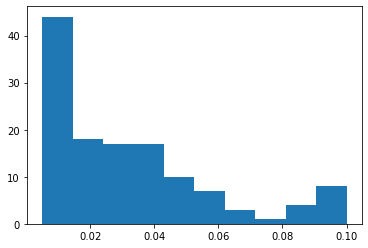

In [ ]:
plt.hist(rewards)


In [18]:
env.close()


In [96]:
setup_data = pd.read_csv(
    "/Users/aditya/Documents/GitHub/game_creation_research/Object Physics Sandbox/human_data/setup_difficulty_scores.csv")
play_data = pd.read_csv(
    "/Users/aditya/Documents/GitHub/game_creation_research/Object Physics Sandbox/human_data/play_difficulty_scores.csv")


In [97]:
participants = list(setup_data["name"].unique())
participants


['Ingrid', 'Chhavi', 'Nav', 'Adi', 'Buz', 'Kieran', 'josh']

In [98]:
scaler = MinMaxScaler()

scaled_data = []
for each_participant in participants:
    scaled_data.append(scaler.fit_transform(np.array(
        setup_data[setup_data["name"] == each_participant]["difficulty"]).reshape(-1, 1)))
setup_data["normed_difficulty"] = np.concatenate(scaled_data)

scaled_data = []
for each_participant in participants:
    scaled_data.append(scaler.fit_transform(np.array(
        play_data[play_data["name"] == each_participant]["difficulty"]).reshape(-1, 1)))
play_data["normed_difficulty"] = np.concatenate(scaled_data)


In [99]:
agg_setup = setup_data.groupby("game_num").agg({"normed_difficulty": np.mean})
agg_play = play_data.groupby("game_num").agg({"normed_difficulty": np.mean})


In [100]:
diff_df = pd.DataFrame()
diff_df["setup"] = agg_setup["normed_difficulty"]
diff_df["play"] = agg_play["normed_difficulty"]
for each_game in playabilities:
    diff_df.loc[each_game, "playability"] = playabilities[each_game]
diff_df.fillna(0, inplace=True)
diff_df


,setup,play,playability
game_num,,,
GAME_1,0.119048,0.357143,0.189167
GAME_2,0.564286,0.666667,0.042546
GAME_3,0.623810,0.416667,0.000000
GAME_4,0.250000,0.642857,0.000000
GAME_5,0.742857,0.732143,0.032060


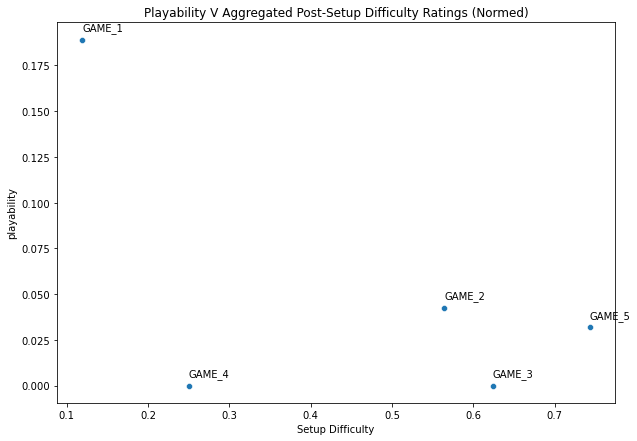

In [101]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x="setup", y="playability", data=diff_df)
plt.title("Playability V Aggregated Post-Setup Difficulty Ratings (Normed)")
plt.xlabel("Setup Difficulty")
ax = plt.gca()
for i, point in diff_df.iterrows():
    ax.text(point['setup'], point['playability'] + 0.005, str(i))
plt.show()


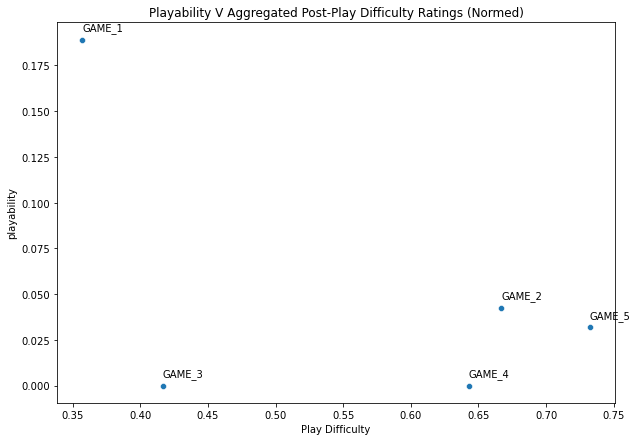

In [102]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x="play", y="playability", data=diff_df)
plt.title("Playability V Aggregated Post-Play Difficulty Ratings (Normed)")
plt.xlabel("Play Difficulty")
ax = plt.gca()
for i, point in diff_df.iterrows():
    ax.text(point['play'], point['playability'] + 0.005, str(i))
plt.show()


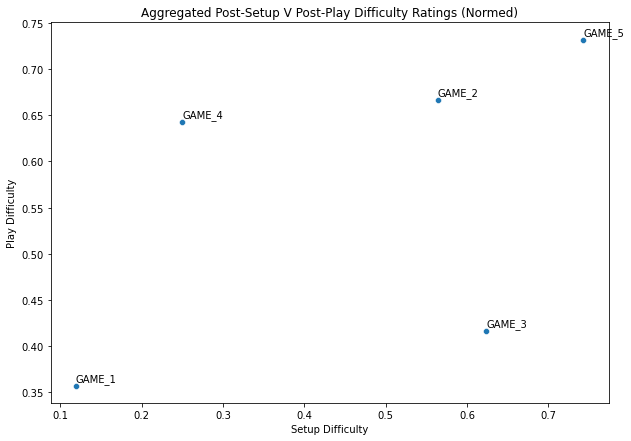

In [103]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x="setup", y="play", data=diff_df)
plt.title("Aggregated Post-Setup V Post-Play Difficulty Ratings (Normed)")
plt.xlabel("Setup Difficulty")
plt.ylabel("Play Difficulty")
ax = plt.gca()
for i, point in diff_df.iterrows():
    ax.text(point['setup'], point['play'] + 0.005, str(i))
plt.show()
